### Building an Tic Tac Toe Agent

#### Reinforcement Learning Framework

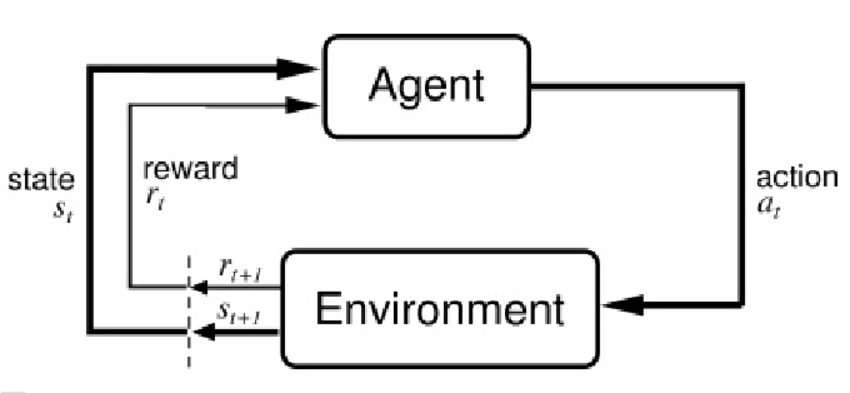

Note:
    
- **Agent** : thing thats playing the game. This is what you'll program an RL algorithm into.

- **Enviroment** : The Enviroment is the thing that the agent interacts with. Its the agents world.

- **State**  : The specific configuration of the enviroment that the Agent is sensing.

#### States:

- Note that the state involves only what the agent can sense, not everything that is about the enviroment.
    - E.g. A robot that vacummes in Australia won't be affected by everything that happens in India.

#### Actions and Rewards
- **Actions**: Actions are the things that an agent can do that will affect its state. 
    - In Tic Tac Toe that is moving a piece on the board
- Performing an action always brings us to the next state, which also comes with a possible reward.

#### Rewards
- Rewards tell you "how good" your action was not whether or not it was an incorrect action or a correct action.
- It does not tell you wether it was your best or your worst action. It's just a number.
- Rewards that you have gotten over your existence does not necessarily represent rewards that you could get in the future.
    - E.g. You could be searching the bad part of a set space and hit a local maximum of 10 pts but the global maximum is 1000 pts, but you would not know that (as the agent). The agent does not know that, but we know that because we designed the game (instance of "God mode" knowledge).
    
    
- Much like life as a human/animal being. You are born into a specific enviroment and you go about your daily life. But what if another person is born in a world without modern medicine. You quickly realize that the local maximum is nowhere near the global maximum. So everything is relative.
- Rewards are only meaningful relative to each other.
    - Rewards are meaningless numbers that only make sence relative to each other. (In terms of reinficement learning, more reward is always better than less reward).

**Notation**:

$$S(t), A(t) \rightarrow R(t+1), S(t+1)$$

Sometimes representes as the 4-tuple:

$$(s,a,r,s^{'})$$

Oddly, the "prime" symbol does not strictly mean "at time t + 1".

Instead:

- $s^{'} = $ state we go to when doing "a" from state "s".

-  $r = $ reward we get when we do "a" while in state "s".

We know that being in state $S(t)$ and taking action $A(t)$ will lead us to the reward $R(t+1)$ and a state $S(t+1)$. When we drop this time index $t$ then we can represent this 4-tuple as $(s,a,r,s^{'})$. Here, we do not prime the r as you expect. This is odd but that is the standard notation. So the prime does not mean at time $t+1$.

#### New terms

##### Episode

**Episode**: An episode represents one run of the the game.

Example:

- Start a tic tac toe game with an empty board.
- As soon as the player gets 3 piecies in a row, that's the end of the episode.

- Our RL agent will learn across **many episodes**

- Example: After playing a large number of games we can have possibly trained an intellgent agent.

- $\#$ episodes we use to train is a **hyperparameter**.
    - How long it will take to train an intelligent game is a hyperparameter and that depends on the game being played, the number of states, how random the game is and so on.

- **Episodic task**: We call playing the game of tic-tactoe an **episodic task** because you play it again and again. (repetitive)
- **Continuous task**: An episodic task is different to a **continuous task** which never ends.
- We won't look at continuous tasks here.

---

- When is the "end" of an episode?
- Certain states in the state space tell us when the episode is over.
- These are states from which no more action can be taken.
- They are called **Terminal states**
- For Tic Tac Toe:
    - One player gets 3 in a row
    - Board is full (draw)

A **terminal state** is a state in which you can take no more action. This means that the episode is over.

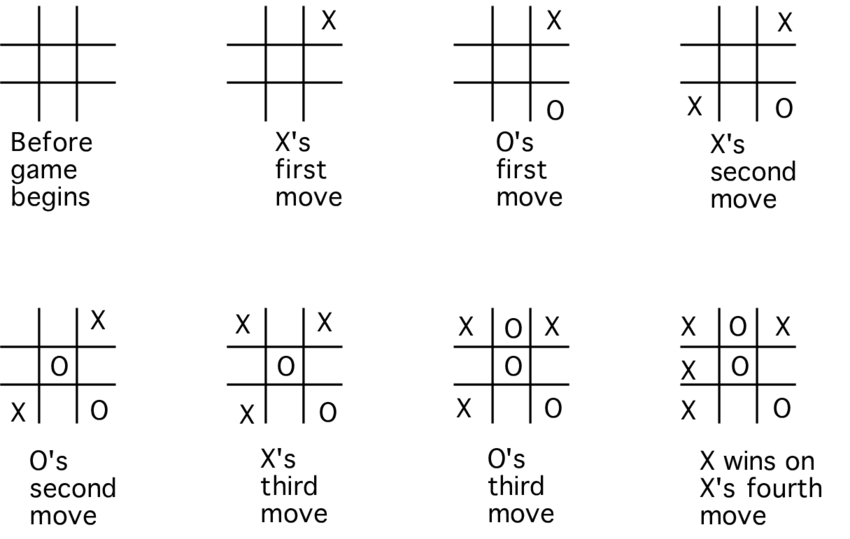